# Config

In [2]:
using YAML
# import Functions from configmanager 
include("ConfigManager.jl")


Main.ConfigManager

In [3]:
config = ConfigManager.load_configs("my-simulation", "v1")

Dict{Any, Any} with 2 entries:
  "notebook" => Dict{Any, Any}("name"=>"my-simulation", "version"=>"v1", "desc"…
  "exp"      => Dict{Any, Any}("model"=>"lotka-volterra.xml", "simulation"=>Dic…

# Run

In [ ]:
# Get the model file path and simulation parameters from the loaded configuration
notebook_config = config["notebook"]
model_path = config["exp"]["model"]
sim_params = config["exp"]["simulation"]

using SBMLToolkit
odesys = readSBML(model_path, ODESystemImporter()) 



┌ Warning: Cannot separate bidirectional kineticLaw `(alpha*prey(t)) / default_compartment` to forward and reverse part. Setting forward to `(alpha*prey(t)) / default_compartment` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit C:\Users\l8105\.julia\packages\SBMLToolkit\7Hd7h\src\reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(gamma_*predator(t)) / default_compartment` to forward and reverse part. Setting forward to `(gamma_*predator(t)) / default_compartment` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit C:\Users\l8105\.julia\packages\SBMLToolkit\7Hd7h\src\reactions.jl:35
┌ Warning: Cannot separate bidirectional kineticLaw `(beta*prey(t)*predator(t)) / (default_compartment^2)` to forward and reverse part. Setting forward to `(beta*prey(t)*predator(t)) / (default_compartment^2)` and reverse to `0`. Stochastic simulations will be inexact.
└ @ SBMLToolkit C:\Users\l8105\.julia\packages\SBMLToolkit\7Hd7h\src\r

Model ##SBML#312:
Equations (2):
  2 standard: see equations(##SBML#312)
Unknowns (2): see unknowns(##SBML#312)
  prey(t) [defaults to 10.0]
  predator(t) [defaults to 5.0]
Parameters (4): see parameters(##SBML#312)
  gamma_ [defaults to 0.4]
  default_compartment [defaults to 1.0]
  beta [defaults to 0.4]
  alpha [defaults to 1.1]

In [48]:
import DifferentialEquations as DE
start = sim_params["start"]
stop = sim_params["stop"]
saveat_val = stop/sim_params["step"]
tspan = (start, stop)

# odesys_simp = structural_simplify(odesys)
prob = DE.ODEProblem(odesys, [], tspan, [])
sol = DE.solve(prob, saveat=saveat_val)


retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
    0.0
   10.0
   20.0
   30.0
   40.0
   50.0
   60.0
   70.0
   80.0
   90.0
  100.0
  110.0
  120.0
    ⋮
  890.0
  900.0
  910.0
  920.0
  930.0
  940.0
  950.0
  960.0
  970.0
  980.0
  990.0
 1000.0
u: 101-element Vector{Vector{Float64}}:
 [10.0, 5.0]
 [16.999999999999982, 5.0]
 [23.999999999999893, 5.0]
 [30.999999999999996, 5.0]
 [38.0, 5.0]
 [45.0, 5.0]
 [52.00000000000002, 5.0]
 [59.00000000000005, 5.0]
 [65.99999999999999, 5.0]
 [73.00000000000001, 5.0]
 [79.99999999999991, 5.0]
 [86.99999999999994, 5.0]
 [93.9999999999999, 5.0]
 ⋮
 [632.9999999999976, 5.0]
 [639.9999999999972, 5.0]
 [646.9999999999959, 5.0]
 [653.9999999999977, 5.0]
 [660.9999999999991, 5.0]
 [667.9999999999984, 5.0]
 [674.9999999999972, 5.0]
 [681.9999999999991, 5.0]
 [688.9999999999943, 5.0]
 [696.0000000000007, 5.0]
 [703.0000000000001, 5.0]
 [709.9999999999999, 5.0]

In [46]:
# convert sol to DataFrame
using DataFrames
df = DataFrame(sol)
ConfigManager.save_data(notebook_config, df, "simulation_results_julia", data_format="csv", verbose=1)

Data saved at C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation\data\v1_simulation_results_julia.csv


In [47]:
import Plots
fig = Plots.plot(sol) # Plots the solution
ConfigManager.save_figure(notebook_config, fig, "simulation_plot_julia", fig_format="png", verbose=1)

Figure saved at C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation\figures\v1_simulation_plot_julia.png


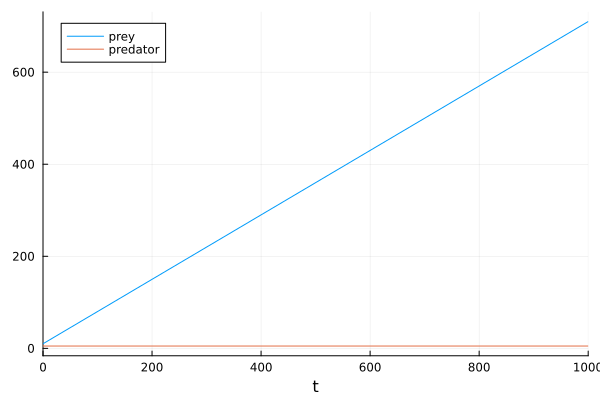

In [50]:
Plots.plot(sol) # Plots the solution